## EDA

In [4]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8-darkgrid')

In [8]:
import pandas as pd
from pathlib import Path

# Get current notebook path
notebook_path = Path().resolve()
print(f"Current notebook path: {notebook_path}")

# Move up two levels to reach project root
project_root = notebook_path.parents[1]
print(f"Project root directory: {project_root}")

# Build relative path to CSV
csv_path = project_root / 'data' / 'raw' / 'ais_dummy' / 'ais_bulk_2012_2017_2022' / 'AIS_2019_01_01.csv'
print(f"CSV path: {csv_path}")

# Load CSV into DataFrame
if csv_path.exists():
    print(f"CSV file found at: {csv_path}")
    ais_df = pd.read_csv(csv_path)  # ✅ Load it
else:
    raise FileNotFoundError(f"CSV file not found at: {csv_path}")

Current notebook path: D:\Projects\Hackathon\Agentic Hackathon\model\anomaly_detection
Project root directory: D:\Projects\Hackathon\Agentic Hackathon
CSV path: D:\Projects\Hackathon\Agentic Hackathon\data\raw\ais_dummy\ais_bulk_2012_2017_2022\AIS_2019_01_01.csv
CSV file found at: D:\Projects\Hackathon\Agentic Hackathon\data\raw\ais_dummy\ais_bulk_2012_2017_2022\AIS_2019_01_01.csv


In [9]:
# Check the first few rows of the DataFrame
print(ais_df.head(5))
# Select only the first 4 Cols
small_df = ais_df.iloc[:, : 4]
print(small_df.head(5))
# Convert to Date object
small_df['BaseDateTime'] = pd.to_datetime(small_df['BaseDateTime'])
# Sorting
small_df_s = small_df.sort_values(['MMSI', 'BaseDateTime'], ascending=[True, True])

        MMSI         BaseDateTime       LAT        LON  SOG    COG  Heading  \
0  338208626  2019-01-01T00:00:05  37.86505 -122.31405  0.0 -165.0    511.0   
1  367420490  2019-01-01T00:00:04  31.26095  -91.65160  4.5   15.0     31.0   
2  338060122  2019-01-01T00:00:04  30.67109  -81.46722  1.9  -67.4    511.0   
3  368018190  2019-01-01T00:00:04  30.70736  -88.04332  0.0 -103.6    301.0   
4  368039230  2019-01-01T00:00:04  35.08305  -90.14214  0.0 -182.3      4.0   

  VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  Cargo  \
0        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
1        NaN  NaN      NaN         NaN    15.0     NaN    NaN    NaN    NaN   
2        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
3        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
4        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   

  TranscieverClass  
0                B  
1       

In [10]:
def animate(list_of_boats,min_i=1000):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)

    x_list = []
    y_list = []
    
    for (x,y) in list_of_boats:
        x_list.append(x[:min_i]) 
        y_list.append(y[:min_i])

    lines = []
    for index in range(len(list_of_boats)):
        lobj = ax.plot(x_list[index],y_list[index],lw=4)[0]
        lines.append(lobj)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x_list = []
        y_list = []
        for (x,y) in list_of_boats:
            x_list.append(x[:i]) 
            y_list.append(y[:i])

        for lnum,line in enumerate(lines):
            line.set_data(x_list[lnum], y_list[lnum]) # set data for each line separately. 
            
        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        
        return lines


    anim = FuncAnimation(fig, animate,frames=200, init_func=init, blit=True)
    plt.close(fig)
    return anim

def viz(nbody=2,MMSIS=None):
    list_of_boats = []
    anims = []
    if MMSIS == None:
        MMSIS = random.sample(small_df_s.MMSI.unique().tolist(),nbody)
    for MMSI in MMSIS:
        print(MMSI)
        boat = small_df_s.loc[small_df_s['MMSI'] == MMSI]
        x = boat['LAT'].tolist()
        y = boat['LON'].tolist()
        list_of_boats.append((x[:1000],y[:1000]))
        if nbody < 3:
            anims.append(animate([(x[:1000],y[:1000])]))
    anims.append(animate(list_of_boats))
    return anims,list_of_boats

anims,_ = viz()

378111607
338098765


In [11]:
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [12]:
import matplotlib as mpl
from IPython.display import HTML

# Correct path (full path to the .exe, not just the folder)
mpl.rcParams['animation.ffmpeg_path'] = r"D:\Installers\ffmpeg\ffmpeg-master-latest-win64-gpl-shared\bin\ffmpeg.exe"

import matplotlib.animation as animation
print(animation.writers.list())  # Should list ffmpeg if correctly configured

mpl.rcParams['animation.writer'] = 'ffmpeg'


['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [13]:
print("Boat 2")
HTML(anims[1].to_html5_video())

Boat 2


In [14]:
print("Boats 1 (Green) and 2 (Red)")
HTML(anims[-1].to_html5_video())

Boats 1 (Green) and 2 (Red)


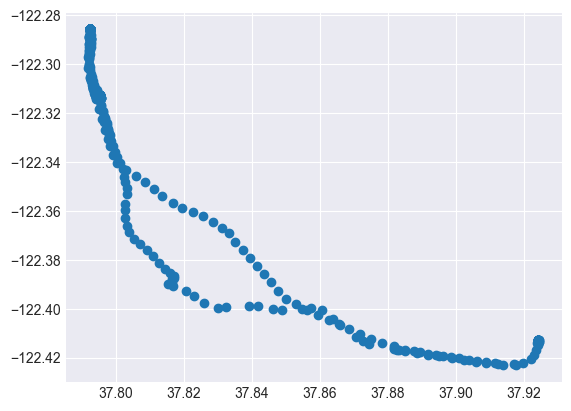

In [15]:
first_ship = small_df_s.loc[small_df_s['MMSI'] == 827396670]
y = first_ship['LON'].tolist()
x = first_ship['LAT'].tolist()
plt.scatter(x,y)
plt.show()

367106130


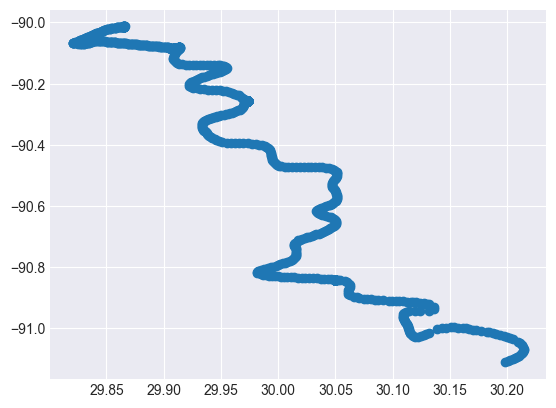

In [16]:
ind = small_df_s['MMSI'][109]
print(ind)
second_ship = small_df_s.loc[small_df_s['MMSI'] == ind]
y2 = second_ship['LON'].tolist()
x2 = second_ship['LAT'].tolist()
plt.scatter(x2,y2)
plt.show()

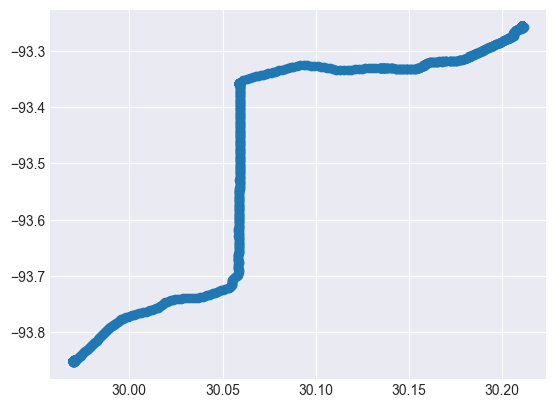

In [17]:
third_ship = small_df_s.loc[small_df_s['MMSI'] == 367551680]
y3 = third_ship['LON'].tolist()
x3 = third_ship['LAT'].tolist()
plt.scatter(x3,y3)
plt.show()

In [18]:
list_of_boats = [(x[:1000],y[:1000]),(x2[:1000],y2[:1000]),(x3[:1000],y3[:1000])]

## Animation of Data 

In [19]:
def animate(list_of_boats,min_i=1000):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)

    x_list = []
    y_list = []
    
    for (x,y) in list_of_boats:
        x_list.append(x[:min_i]) 
        y_list.append(y[:min_i])

    lines = []
    for index in range(len(list_of_boats)):
        lobj = ax.plot(x_list[index],y_list[index],lw=4)[0]
        lines.append(lobj)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x_list = []
        y_list = []
        for (x,y) in list_of_boats:
            x_list.append(x[:i]) 
            y_list.append(y[:i])

        for lnum,line in enumerate(lines):
            line.set_data(x_list[lnum], y_list[lnum]) # set data for each line separately. 
            
        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        
        return lines


    anim = FuncAnimation(fig, animate,frames=200, init_func=init, blit=True)
    
    return anim


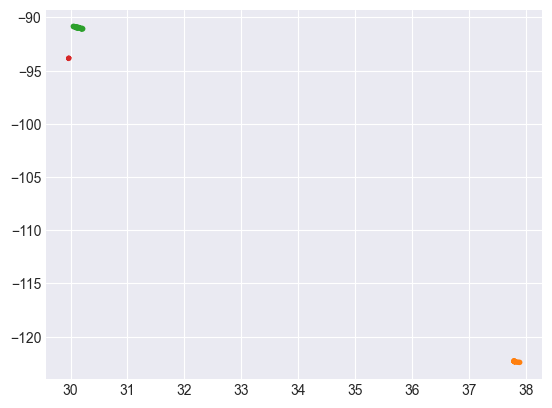

In [20]:
anim = animate(list_of_boats)
HTML(anim.to_html5_video())


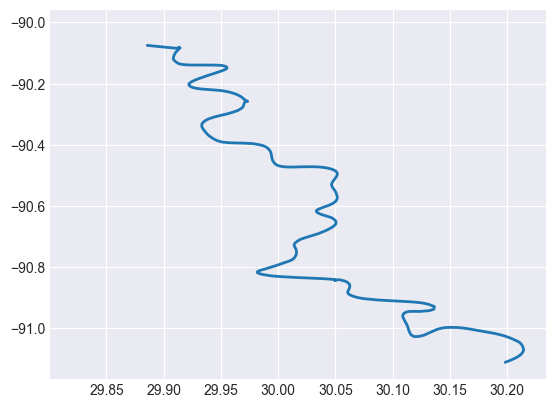

In [21]:
fig, ax = plt.subplots()
line, = ax.plot(x2, y2, lw=2)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    line.set_data(x2[:i],y2[:i])
    return line,

anim = FuncAnimation(fig, animate,frames=1000, interval=100, init_func=init, blit=True)


HTML(anim.to_html5_video())

## Training Model

In [22]:
# Drop rows with missing vessel type (label)
ais_df = ais_df.dropna(subset=['VesselType'])

# Select numeric features and label
features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']
label = 'VesselType'

# Drop NaNs in selected columns
train_df = ais_df[features + [label]].dropna()

# Prepare X and y
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df[label]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
import time
from sklearn.ensemble import RandomForestClassifier

since = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
elasped_time = time.time() - since
print(f"The training time is {elasped_time//60:.0f}m {elasped_time%60:.0f}s")

The training time is 1m 52s


## Predicting and Metrics

In [24]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score
)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")


Accuracy: 0.9931
Balanced Accuracy: 0.9733
Precision (macro): 0.9759
Recall (macro): 0.9733
F1 Score (macro): 0.9746


In [25]:
from sklearn.metrics import roc_auc_score
# If you have a probability output (e.g. clf.predict_proba) and it's binary or one-vs-rest multiclass
y_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9932


In [26]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

print(f"Cohen Kappa Score: {cohen_kappa_score(y_test, y_pred):.4f}")
print(f"Matthews Corrcoef: {matthews_corrcoef(y_test, y_pred):.4f}")


Cohen Kappa Score: 0.9915
Matthews Corrcoef: 0.9915


## Saving the Model

In [27]:
import os
import joblib

save_path = "../model_utils/ais"
os.makedirs(save_path, exist_ok=True)

# Save model, label encoder and scaler
joblib.dump(clf, os.path.join(save_path, "rf_model.joblib"))
joblib.dump(le, os.path.join(save_path, "label_encoder.joblib"))
joblib.dump(scaler, os.path.join(save_path, "scaler.joblib"))

print("Model, encoder, and scaler saved successfully.")


Model, encoder, and scaler saved successfully.
